# Detección MAP y ML para función de distribución de Poisson (canal de fibra óptica)
1) Grafique en una misma figura las probabilidades condicionales P(Y|H) para H=0 y H=1 del Ejemplo 2.4 del libro. Elija parámetros para la función de densidad de Poisson y saque conclusiones

2) Genere una distribución de Poisson y realice su histograma

3) Determine las regiones de decisión MAP y ML. Para el caso MAP, proponga una distribución de probabilidad de las hipótesis

4) Estime estadísticamente la probabilidad error y realice una gráfica de probabilidad de error vs SNR[DB]

(array([2.6300e+03, 0.0000e+00, 0.0000e+00, 0.0000e+00, 7.4730e+03,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 1.1251e+04, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 1.1076e+04, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 8.2400e+03, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        5.1050e+03, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        2.5500e+03, 0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0670e+03,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 4.1500e+02, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 1.2500e+02, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 4.9000e+01, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        1.7000e+01, 0.0000e+00, 0.0000e+00, 0.0000e+00, 2.0000e+00]),
 array([ 0.  ,  0.24,  0.48,  0.72,  0.96,  1.2 ,  1.44,  1.68,  1.92,
         2.16,  2.4 ,  2.64,  2.88,  3.12,  3.36,  3.6 ,  3.84,  4.08,
         4.32,  4.56,  4.8 ,  5.04,  5.28,  5.52,  5.76,  6.  ,  6.24,
         6.48,  6.72,  6.96,  7.2 ,  7.44,  7.68,  7.92,  8.16,  8.4 ,
         8.64,  8.88,  9.12,  9.36

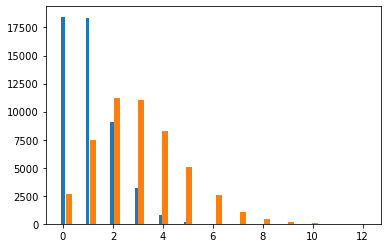

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
lambda0 = 1
lambda1 = 3
nb_samples = 50000

# Analizando la estadística
signal_received_h0 =  np.random.poisson(lambda0, nb_samples)
signal_received_h1 = np.random.poisson(lambda1, nb_samples)

plt.hist(signal_received_h0,50,align='left')
plt.hist(signal_received_h1,50,align='right')


El criterio de decisión para el caso ML es para lambda0=1 y lambda1=3 $$y\gt 1 \Rightarrow \hat{H}=1 \\ y\le 1 \Rightarrow \hat{H}=0$$

In [ ]:
# Simulador de hipotesis + canal + receptor
# GENERADOR DE HIPOTESIS
hypothesis = np.random.randint(0,2,nb_samples)
# SALIDA DEL CANAL
y = [np.random.poisson(lambda1) if hypothesis[i]>0 else np.random.poisson(lambda0) for i in range(nb_samples)]
# RECEPTOR
nivel = 1
hypothesis_detected = [1 if y[i]>nivel else 0 for i in range(nb_samples)]

pe = sum(abs(hypothesis - np.array(hypothesis_detected)))/nb_samples
print(pe)

0.23262


## Pe vs SNR
Sea y la cantidad de fotones a la salida del foto detector. La media y varianza está dada por $$\mu = E\{y\}=\sum_{y=0}yp(y)=\sum_{y=0}yp(y/ho)p(ho)+\sum_{y=0}yp(y/h1)p(h1)=\lambda_o p(ho)+\lambda_1p(h1)$$
$$\sigma^2=E\{(y-\mu)^2\}=\lambda_o p(ho)+\lambda_1p(h1)$$
De este modo, la relación entre la potencia de la señal $\mu^2$ y su varianza (ruido) está dada por
$$SNR = \frac{\mu^2}{\sigma^2}=\lambda_o p(ho)+\lambda_1p(h1)$$

[3.3398e-01 2.3190e-01 1.0480e-01 3.0220e-02 5.5600e-03 1.2000e-04]


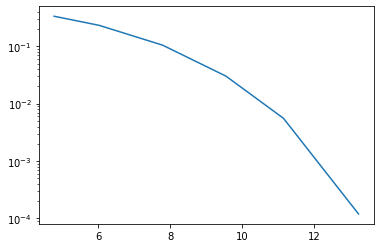

In [ ]:
# Las diferentes SNR se generan variando lambda1
import numpy as np
import matplotlib as plt

lambda1 = np.array([2, 3, 5, 8, 12, 20])
snrdB = 10*np.log10(lambda0 + lambda1)
ber = np.array([])
lambda0 = 1
for lambdaX in lambda1:
  # SALIDA DEL CANAL
  y = [np.random.poisson(lambdaX) if hypothesis[i]>0 else np.random.poisson(lambda0) for i in range(nb_samples)]
  # RECEPTOR
  nivel =  (lambdaX-lambda0)/np.log(lambdaX/lambda0)
  hypothesis_detected = [1 if y[i]>nivel else 0 for i in range(nb_samples)]
  ber = np.append(ber, sum(abs(np.array(hypothesis_detected) - hypothesis))/nb_samples)
print(ber)

plt.pyplot.semilogy(snrdB,ber)

[![CC BY 4.0][cc-by-shield]][cc-by]

This work is licensed under a
[Creative Commons Attribution 4.0 International License][cc-by].

[![CC BY 4.0][cc-by-image]][cc-by]

[cc-by]: http://creativecommons.org/licenses/by/4.0/
[cc-by-image]: https://i.creativecommons.org/l/by/4.0/88x31.png
[cc-by-shield]: https://img.shields.io/badge/License-CC%20BY%204.0-lightgrey.svg

![logo_neon_erasmus](https://github.com/neon-iot/communicationlabs/BannerSupportErasmus.png)

![title](https://github.com/neon-iot/communication_labs/blob/main/BannerSupportErasmus.png)

![Waterfall](https://images.unsplash.com/photo-1593322962878-a4b73deb1e39?ixid=MXwxMjA3fDB8MHx0b3BpYy1mZWVkfDc3NHw2c01WalRMU2tlUXx8ZW58MHx8fA%3D%3D&ixlib=rb-1.2.1&auto=format&fit=crop&w=800&q=60)


<img src="https://github.com/neon-iot/communication_labs/blob/main/BannerSupportErasmus.png", width = 200, height = 200>